In [1]:
# Checking working directory

import os
print(os.getcwd())

/Users/harvey/Desktop/CodingProjects/flask_Playground


In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import missingno as msno
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder

In [3]:
# Creating dataframe
df = pd.read_csv("loanDefault.csv")

In [4]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
# Needed some visualization
#pd.set_option('display.max_columns', None)
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
# Count the number of duplicate records
duplicate_count = df.duplicated().sum()

# Print the number of duplicate records
print("Number of duplicate records: ", duplicate_count)

Number of duplicate records:  0


In [7]:
# Trying to clean categorical to numerical 

### DEPRECATED DO NOT RUN

    # loan_limit: NaN=0, cf=1, ncf=2
#df['loan_limit'] = df['loan_limit'].fillna(0)
#df['loan_limit'].replace(['cf', 'ncf'], [1, 2], inplace=True)
    # Gender: Sex Not Avail=0, Male=1, Female=2, Joint=3
#df['Gender'].replace(['Sex Not Available', 'Male', 'Female', 'Joint'], [0, 1, 2, 3], inplace=True)
    # approv_in_adv: NaN=0, nopre=1, pre=2
#df['approv_in_adv'] = df['approv_in_adv'].fillna(0)
#df['approv_in_adv'].replace(['nopre', 'pre'], [1, 2], inplace=True)
    # loan_type: type1=1, type2=2, type3=3
#df['loan_type'].replace(['type1', 'type2', 'type3'], [1, 2, 3], inplace=True)
    # loan_purpose: NaN=0, p1=1, p2=2, p3=3, p4=4
#df['loan_purpose'] = df['loan_purpose'].fillna(0)
#df['loan_purpose'].replace(['p1', 'p2', 'p3', 'p4'], [1, 2, 3, 4], inplace=True)
    # Credit_Worthiness: l1=1, l2=2
#df['Credit_Worthiness'].replace(['l1', 'l2'], [1, 2], inplace=True)
    # open_credit: nopc=0, opc=1
#df['open_credit'].replace(['nopc', 'opc'], [0, 1], inplace=True)
    # business_or_commercial: nob/c=0, b/c=1
#df['business_or_commercial'].replace(['nob/c', 'b/c'], [0, 1], inplace=True)
    # rate_of_interest: 
    # Interest_rate_spread
    # Upfront_charges
#df['Upfront_charges'] = df['Upfront_charges'].fillna(0)
    # Neg_ammortization
#df['Neg_ammortization'] = df['Neg_ammortization'].fillna(0)
#df['Neg_ammortization'].replace(['not_neg', 'neg_amm'], [1, 2], inplace=True)
    # interest_only
#df['interest_only'].replace(['not_int', 'int_only'], [0, 1], inplace=True)
    # lump_sum_payment
#df['lump_sum_payment'].replace(['not_lpsm', 'lpsm'], [0, 1], inplace=True)
    # property_value
    # construction_type
#df['construction_type'].replace(['sb', 'mh'], [0, 1], inplace=True)
    # occupancy_type
#df['occupancy_type'].replace(['pr', 'ir', 'sr'], [0, 1, 2], inplace=True)
    # Secured_by
#df['Secured_by'].replace(['home', 'land'], [0, 1], inplace=True)
    # total_units
#df['total_units'].replace(['1U', '2U', '3U', '4U'], [1, 2, 3, 4], inplace=True)
    # Income
    # credit_type
#df['credit_type'].replace(['CIB', 'CRIF', 'EXP', 'EQUI'], [1, 2, 3, 4], inplace=True)
    # co-applicant_credit_type
#df['co-applicant_credit_type'].replace(['CIB', 'EXP'], [0, 1], inplace=True)
    # age
#df['age'] = df['age'].fillna(0)
#df['age'].replace(['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
    # submission_of_application
#df['submission_of_application'] = df['submission_of_application'].fillna(0)
#df['submission_of_application'].replace(['to_inst', 'not_inst'], [1, 2], inplace=True)
    # LTV
    # Region
#df['Region'].replace(['North', 'south', 'central', 'North-East'], [1, 2, 3, 4], inplace=True)
    # Security_Type
#df['Security_Type'].replace(['direct', 'indirect'], [1, 2], inplace=True)
    # dtir

In [8]:
# Statistics for each column
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

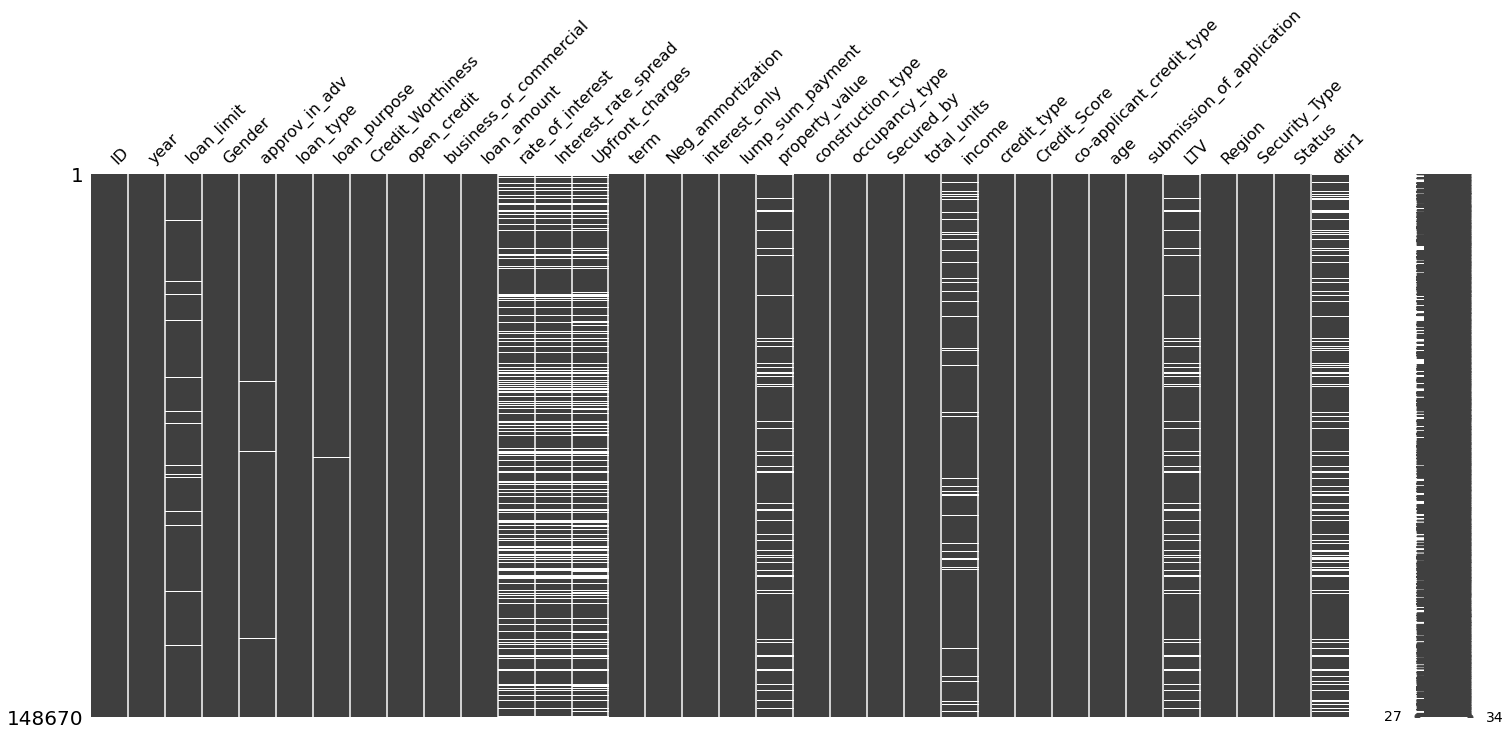

<Figure size 1080x648 with 0 Axes>

In [9]:
# Null values
nas = df.isna().sum()
print(nas)

# Visualizing Null values (image)
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()


In [10]:
# Make sure there are no columns with missing values
missing_values_table(df).head(50)

Your selected dataframe has 34 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Upfront_charges,39642,26.7
Interest_rate_spread,36639,24.6
rate_of_interest,36439,24.5
dtir1,24121,16.2
property_value,15098,10.2
LTV,15098,10.2
income,9150,6.2
loan_limit,3344,2.2
approv_in_adv,908,0.6
age,200,0.1


In [12]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = df.corr(numeric_only=True)["Status"].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')
# Print the most positive correlations
print(correlations_data.tail(15))

income                 -0.065119
property_value         -0.048864
loan_amount            -0.036825
Upfront_charges        -0.019138
term                   -0.000240
ID                      0.001703
Credit_Score            0.004004
rate_of_interest        0.022957
LTV                     0.038895
dtir1                   0.078083
Status                  1.000000
year                         NaN
Interest_rate_spread         NaN
Name: Status, dtype: float64 

income                 -0.065119
property_value         -0.048864
loan_amount            -0.036825
Upfront_charges        -0.019138
term                   -0.000240
ID                      0.001703
Credit_Score            0.004004
rate_of_interest        0.022957
LTV                     0.038895
dtir1                   0.078083
Status                  1.000000
year                         NaN
Interest_rate_spread         NaN
Name: Status, dtype: float64


In [13]:
# Convert all column names to lowercase
df.columns=df.columns.str.lower()

# Make ID string type
df['id'] = df['id'].astype(str)

# Drop year since all entries are 2019
df.drop(columns=['year'], inplace=True)

# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  object 
 1   loan_limit                 145326 non-null  object 
 2   gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   credit_worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  interest_rate_spread       112031 non-null  float64
 12  upfront_charges            109028 non-null  float64
 13  term                       14

In [14]:
# Getting dataframes by datatype
dtypes = pd.DataFrame(df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [15]:
print(num_vars)
print(cat_vars)
# We'll start with numerical data first. An effective way of filling NaN values 
# for numerical data is using a KNNImputer from sklearn. We could fill in the null 
# values using the column median but this will often bias the data, especially 
# when there are many missing values. KNNImputer uses the columns that have values 
# (at that index) to estimate the null value of a certain entry.

['loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'income', 'credit_score', 'ltv', 'status', 'dtir1']
['id', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type']


In [16]:
# ====================================================================
# Imputing: Numeric Data
# ====================================================================

# Numeric Dataframe
df_num = df[num_vars]


# knn
knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)

# Check for any nas
df_num = pd.DataFrame(X, columns=num_vars)
nas_num = df_num.isna().sum()
print(nas_num)


loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


In [17]:
# Imputing Categorical Data

# Categorical Dataframe
df_cat = df[cat_vars]

for i in cat_vars:
    mode = df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

# Check for any nas
nas_cat = df_cat.isna().sum()
print(nas_cat)

<ipython-input-17-08f162c745c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(value=mode, inplace=True)
<ipython-input-17-08f162c745c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(value=mode, inplace=True)
<ipython-input-17-08f162c745c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(value=mode, inplace=True)
<ipython-input-17-08f162c745c9>:9: SettingWithCopyWarning: 
A value

id                           0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security_type                0
dtype: int64


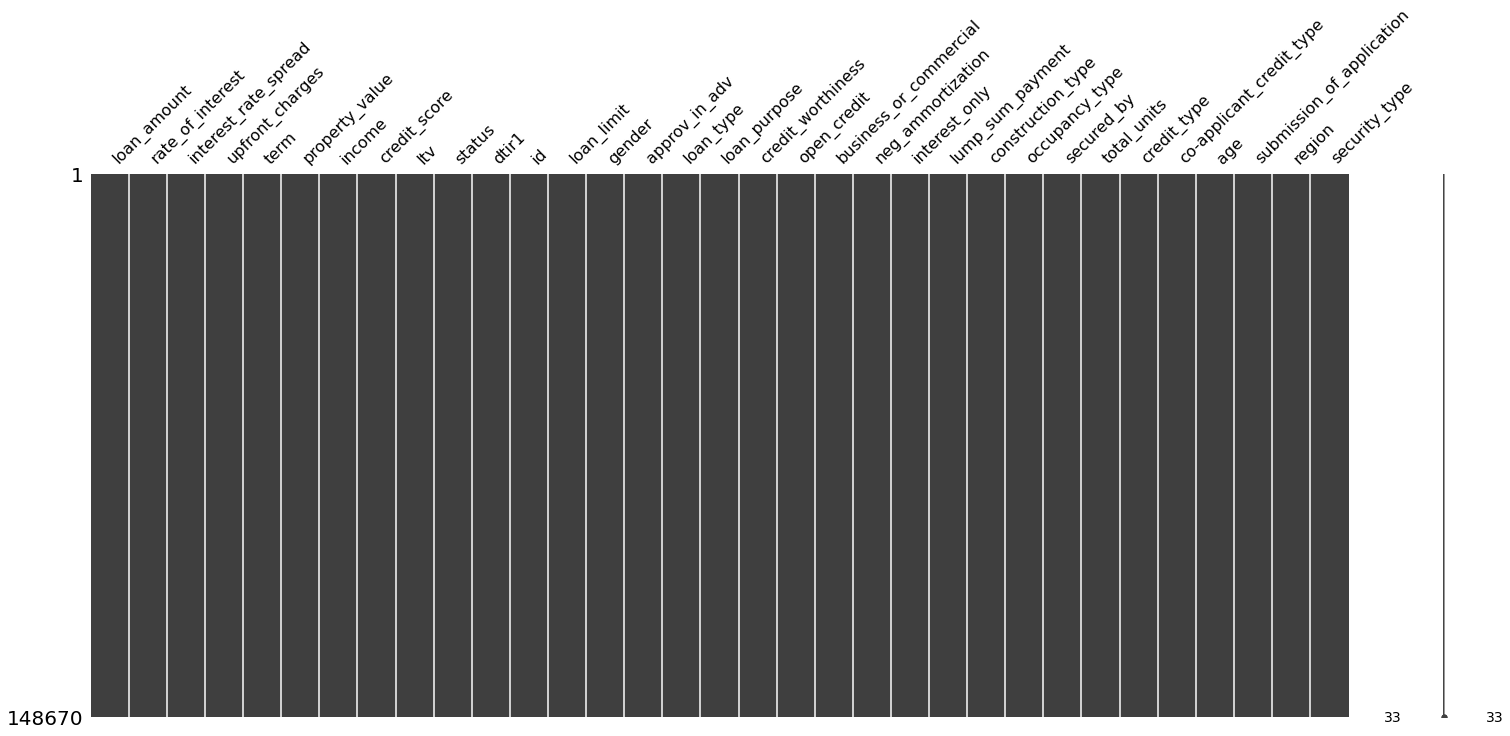

<Figure size 1080x648 with 0 Axes>

In [18]:
# Combining dataframes
df_full = pd.concat([df_num, df_cat], axis=1, join='inner')

# Full dataframe visualization of null values
msno.matrix(df_full)
plt.figure(figsize = (15,9))
plt.show()

In [19]:
####################
# Finding Outliers #
####################

df_num = df_full[num_vars]

# Function for finding outliers using 3 times the IQR
def find_outliers_IQR(col):
   Q1=col.quantile(0.25)
   Q3=col.quantile(0.75)
   IQR=Q3-Q1
   outliers = col[((col<(Q1-3*IQR)) | (col>(Q3+3*IQR)))]
   return(outliers)

# Function for finding proportion of column that is null
def outlier_prop(outliers, col):
    outlier_size = len(outliers)
    return outlier_size / (len(col) + outlier_size)

# Termporary dataframe
df_temp = df_full.copy()

# Both term and status are 15-20% outliers and can be treated as categorical variables
df_temp['term'] = df_temp['term'].astype(str)
df_temp['status'] = df_temp['status'].astype(str)


# Getting num_vars and cat_vars
dtypes = pd.DataFrame(df_temp.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

# Getting proportion of 
outlier_props = []
cols = []
for i in num_vars:
    outliers = find_outliers_IQR(df_temp[i])
    cols.append(i)
    prop = outlier_prop(outliers, df_temp[i])
    outlier_props.append(prop)

outlier_props_df = pd.DataFrame([cols, outlier_props], index=['Variable', 'OutlierProp']).transpose()

# Deleting outliers
for col in num_vars:
    q1 = df_temp[col].quantile(0.25)
    q3 = df_temp[col].quantile(0.75)
    IQR = q3-q1
    lower = q1-3*IQR
    upper = q3+3*IQR
    df_temp = df_temp[(df_temp[col] < upper) & (df_temp[col] > lower)]
    
df_full = df_temp

# Term
term_vals = pd.DataFrame(df_full['term'].value_counts().reset_index())

# Drop terms that have less than 10 appearences in dataset
terms_to_drop = []
for i, l in zip(term_vals['index'], term_vals['term']):
    if l < 10:
        terms_to_drop.append(i)

for i in terms_to_drop:
    df_full = df_full[df_full['term'] != i]

# Remaining Data
proportion_remaining = round(len(df_full) / len(df), 5)
proportion_dropped = round(1 - proportion_remaining, 2) * 100
dropped = len(df) - len(df_full)
print("We dropped ", dropped, ' rows from the dataset')
print("That is about", proportion_dropped, "% of the original dataset" )
print("The proportion of the original dataset remaining is:  ", proportion_remaining)



# Make term categorical dtype
df_full['term'] = df_full['term'].astype('float')

We dropped  4812  rows from the dataset
That is about 3.0 % of the original dataset
The proportion of the original dataset remaining is:   0.96763


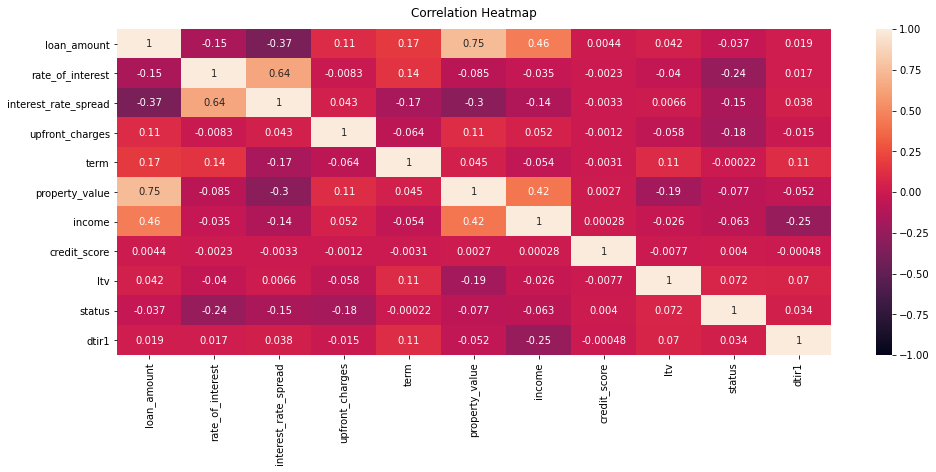

In [20]:
#################################
# DATA IS CLEAN -- ANALYSIS NOW #
#################################

# Correlation
corr = df_num.corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

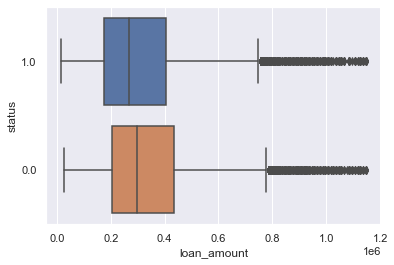

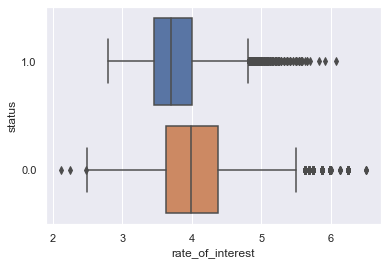

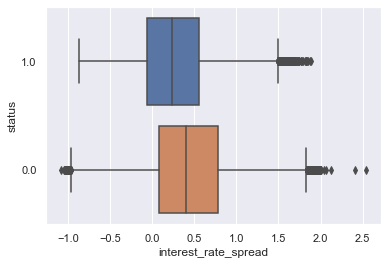

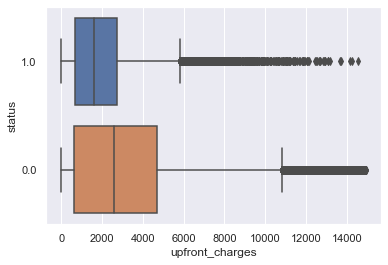

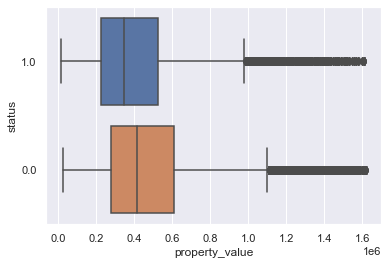

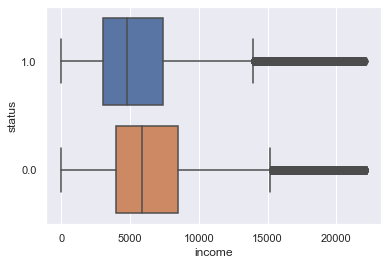

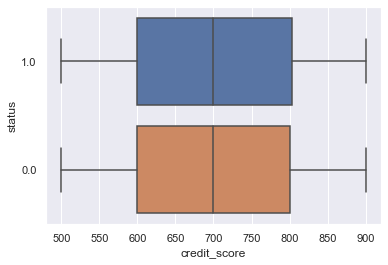

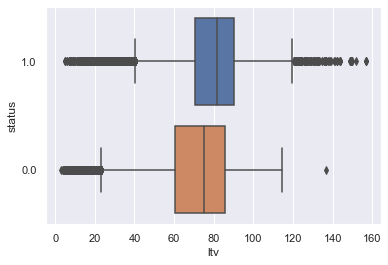

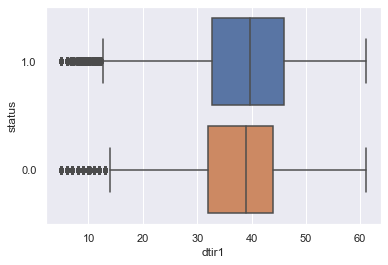

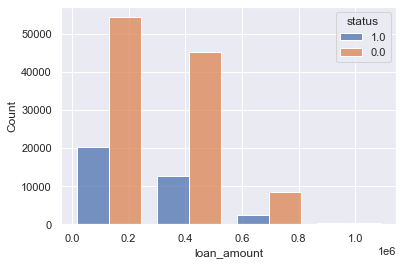

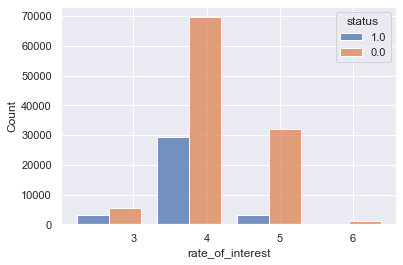

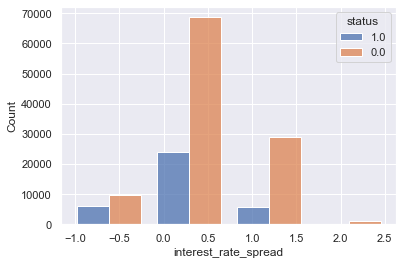

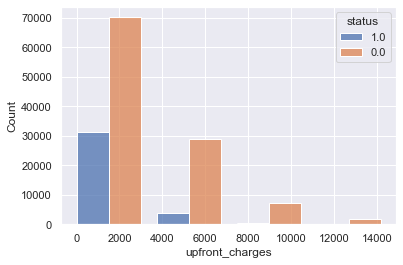

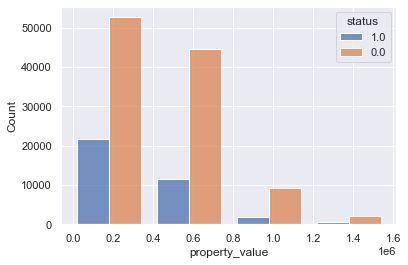

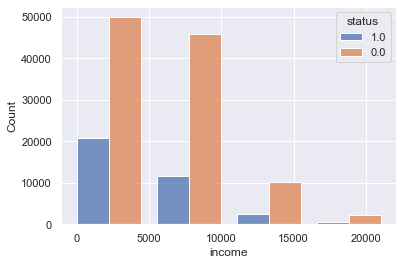

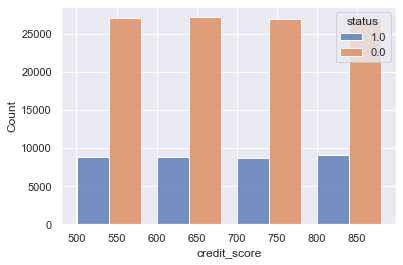

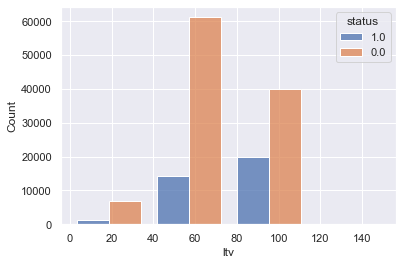

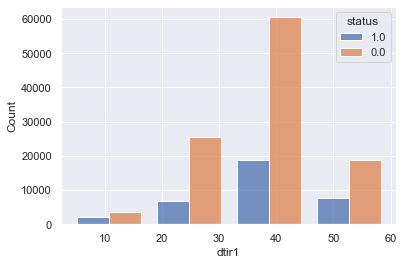

In [21]:
# Boxplots
for i in num_vars:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.boxplot(x=i, y='status', data=df_full)
    plt.show()
    
# Histograms
for i in num_vars:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df_full, x=i, hue="status", multiple="dodge", shrink=.8, bins=4)
    plt.show()

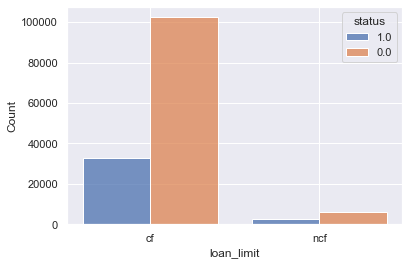

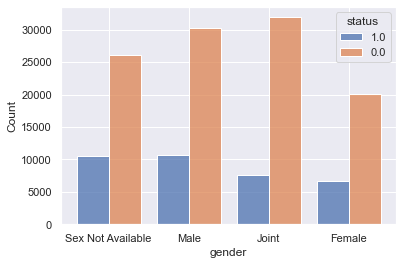

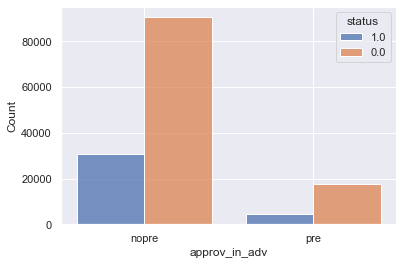

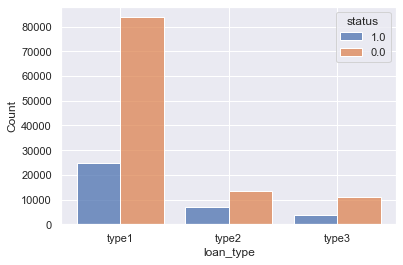

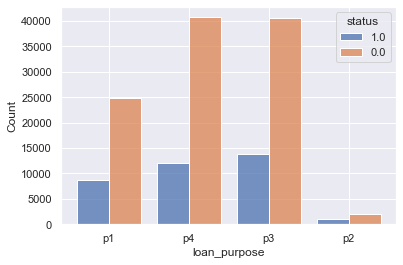

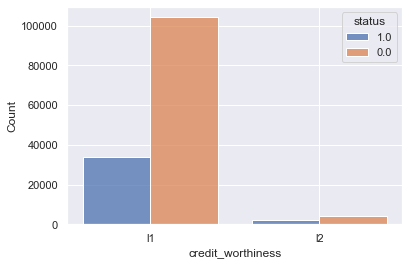

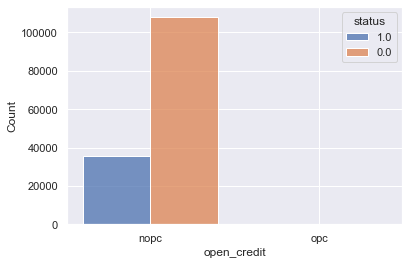

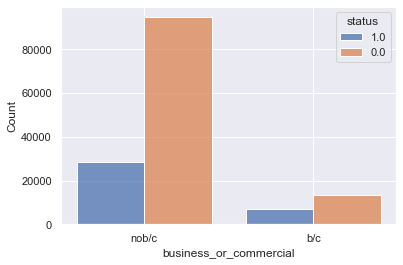

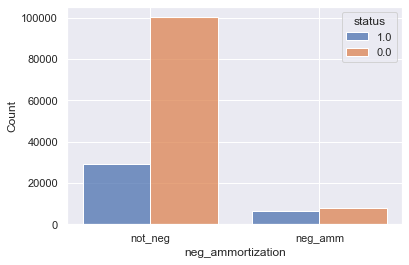

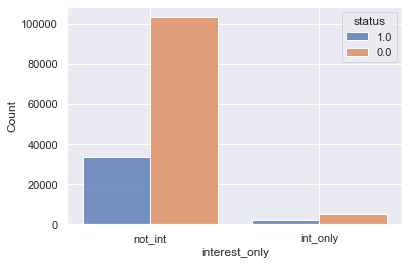

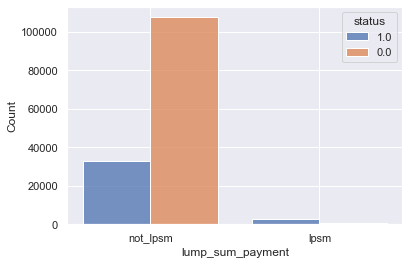

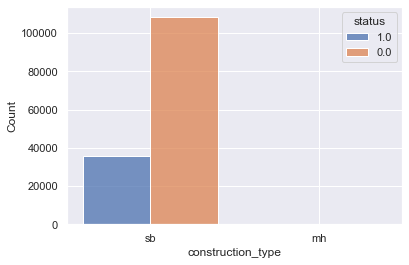

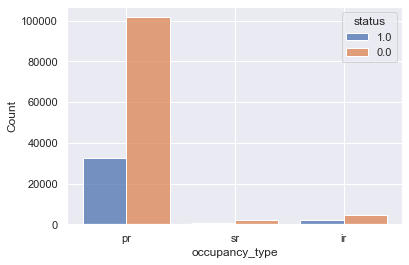

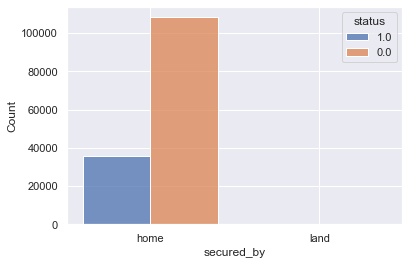

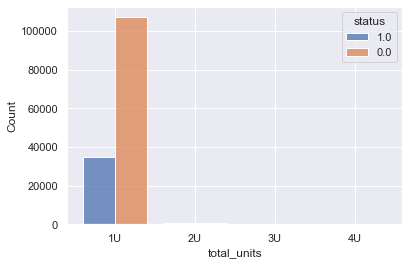

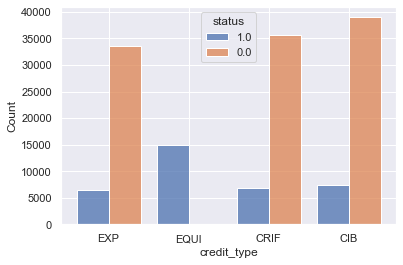

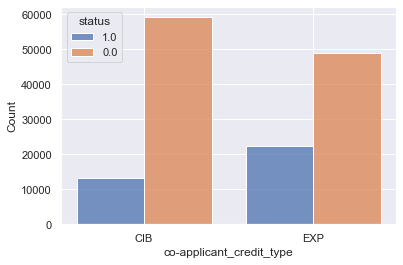

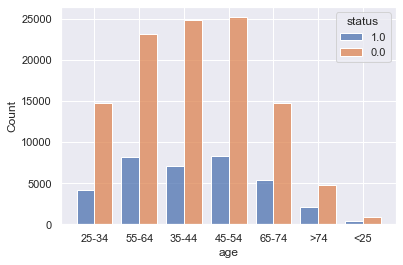

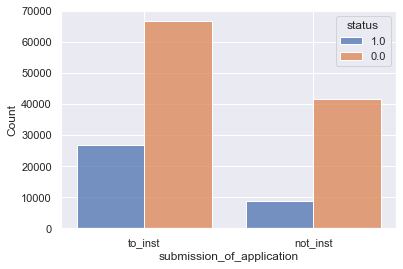

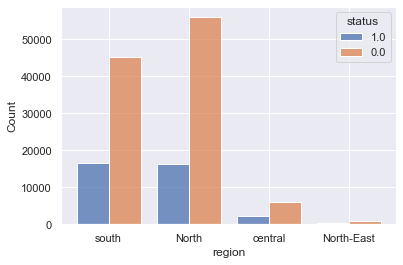

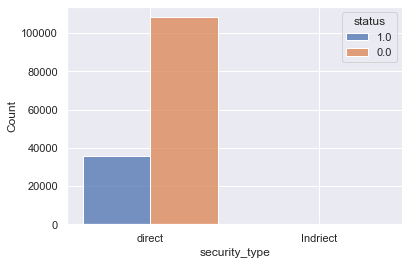

1.0    32
Name: status, dtype: int64

In [22]:
# ====================================================================
# Categorical Data
# ====================================================================

def plot_hist(col):
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df_full, x=col, hue="status", multiple="dodge", shrink=.8, stat='count')
    plt.show()


# loan_limit
plot_hist(df_full['loan_limit'])

# Gender
plot_hist(df_full['gender'])

# approved in advance
plot_hist(df_full['approv_in_adv'])

# loan_type
plot_hist(df_full['loan_type'])

# loan_purpose
plot_hist(df_full['loan_purpose'])

# Credit worthiness
plot_hist(df_full['credit_worthiness'])

# Open credit
plot_hist(df_full['open_credit'])

# Business or commercial
plot_hist(df_full['business_or_commercial'])

# neg_ammortization
plot_hist(df_full['neg_ammortization']) # neg_amm more likely to default

# interest_only
plot_hist(df_full['interest_only'])

# Lump sum payment
plot_hist(df_full['lump_sum_payment'])
df_full['lump_sum_payment'].value_counts()
lpsm = df_full[df_full['lump_sum_payment'] == 'lpsm']
lpsm['status'].value_counts() # Vast majority of lumpsum payments default

# Construction type
plot_hist(df_full['construction_type'])
df['construction_type'].value_counts() # Only 33 values for mh
mh = df_full[df_full['construction_type'] == 'mh']
mh['status'].value_counts() # All mh vals were defaults

# occupancy_type
plot_hist(df_full['occupancy_type'])

# secured_by
plot_hist(df_full['secured_by'])
df_full['secured_by'].value_counts()
land = df_full[df_full['secured_by'] == 'land']
land['status'].value_counts() # All land security defaulted

# total_units
plot_hist(df_full['total_units'])
df_full['total_units'].value_counts()

# credit_type
plot_hist(df_full['credit_type']) # All EQUI credit type defaults

# co-applicant_credit_type
plot_hist(df_full['co-applicant_credit_type'])

# age
plot_hist(df_full['age'])

# submission_of_application
plot_hist(df_full['submission_of_application'])

# region
plot_hist(df_full['region'])

# security_type
plot_hist(df_full['security_type'])
df_full['security_type'].value_counts()
indirect = df_full[df_full['security_type'] == 'Indriect']
indirect['status'].value_counts() # All indirect security type defaults

In [ ]:
# Some important things to note:

#There are a six columns where a particular value was not seen often in the dataset 
#and would be considered an outlier. 
#However, for each of these columns, the instances where the infrequent values occur are 
#instances where the loan-borrower defaulted. Thus, this is important data to keep.

#14 of the categorical variables are binary, which will be important for us when we 
#encode the categorical attributes.

#It is clear that the high property values do NOT result in more defaults. 
#The contrary is true.

In [23]:
# ====================================================================
# Encoding Categorical Variables
# ====================================================================

df_full.drop(columns=['id'], inplace=True)

dtypes = pd.DataFrame(df_full.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)



# Binary variables
binary_vars = ['security_type', 'submission_of_application', 'co-applicant_credit_type', 'secured_by',
               'lump_sum_payment', 'interest_only', 'neg_ammortization', 'construction_type', 'business_or_commercial',
               'open_credit', 'credit_worthiness', 'approv_in_adv', 'loan_limit', 'status']

In [24]:
# The reason we are creating a list of the binary variables is to reduce the size of our 
# dataframe after encoding. We want to use a Label Encoder for the binary variables which 
# will result in one column of 1's and 0's. If we were to use sklearn's OneHotEncoder on 
# binary variables, it would create two columns, one for each possible value, which is 
# redundant considering we can use one column where the value "1" represents one possible 
# value and "0" represents the other.

In [25]:
# Label Encoder
label = LabelEncoder()
for i in binary_vars:
    df_full[i] = label.fit_transform(df_full[i])



# OneHotEncoding
df_cat = df_full[cat_vars]
df_cat.drop(columns=binary_vars, inplace=True)

df_cat.columns

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())


# Column names
cat_encoder.categories_
cat_columns = ['Female', 'Joint', 'Male', 'Sex Not Available',
               'type1', 'type2', 'type3',
               'p1', 'p2', 'p3', 'p4',
               'ir', 'pr', 'sr',
               'U1', 'U2', 'U3', 'U4',
               'CIB', 'CRIF', 'EQUI', 'EXP',
               'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'under_25', 'over_74',
               'North', 'North-East', 'central', 'south']

df_cat_encoded.columns = cat_columns
df_full.drop(columns=df_cat.columns, inplace=True)
# Concat
df = pd.concat([df_full, df_cat_encoded], axis=1, join='inner')

<ipython-input-25-5622a068ae3c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=binary_vars, inplace=True)


In [28]:
# ====================================================================
# Splitting Data
# ====================================================================

# train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

y_train = train_set['status']
X_train = train_set.drop(columns=['status'])
y_test = test_set['status']
X_test = test_set.drop(columns=['status'])

In [33]:
# Train the model

# ====================================================================
# Random Forest Classifier: 0.911 accuracy on test set
# ====================================================================

# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
print(accuracy_score(y_test, rf_preds))
confusion_matrix(y_test, rf_preds)

0.9109945763442405


array([[20460,   520],
       [ 1958,  4903]])

In [30]:
# ====================================================================
# XGBoost Classifier: 0.9733 accuracy on test set
# ====================================================================

# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Scores on train set
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
accuracy_score(y_test, xgb_preds)
confusion_matrix(y_test, xgb_preds)

Mean cross-validation score: 0.97


array([[20848,   132],
       [  590,  6271]])

In [32]:
# ====================================================================
# Naive Bayesian Classifer: 0.7865
# ====================================================================

# Fitting Model: Guassian
naive_bayes = GaussianNB()
naive_bayes.fit(X_train , y_train)

#Predict on test data
nb_preds = naive_bayes.predict(X_test)

# Test set performance: 0.7516
accuracy_score(y_test, nb_preds)
confusion_matrix(y_test, nb_preds)


# Fitting Model: Bernouli
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train , y_train)


#Predict on test data
nb_preds = naive_bayes.predict(X_test)

# Test set performance: 0.7865
print(accuracy_score(y_test, nb_preds))
confusion_matrix(y_test, nb_preds)

0.7865019216263783


array([[20426,   554],
       [ 5390,  1471]])

In [34]:
#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)

# Exporting model of choice (XGBoost) for backend
with open('model.pkl', 'wb') as f:
    pickle.dump(xgbc, f)